In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns


In [4]:
df = pd.read_csv('online_retail_new.csv')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
analysis_date = np.max(df['InvoiceDate'])

rfm = df.groupby('CustomerID').agg(Recency=('InvoiceDate', lambda x: (analysis_date - x.max()).days),
                                   Frequency=('InvoiceNo', lambda x: x.nunique()),
                                   Monetary=('SaleAmount', 'sum')).reset_index()

new_order = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm = rfm[new_order]
rfm.to_csv('rfm.csv')
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,4219.000000,4219.000000,4219.000000,4219.000000
mean,15290.745674,83.824840,4.060678,1971.240996
std,1720.241351,90.086268,7.101487,8666.739032
min,12346.000000,0.000000,1.000000,3.750000
25%,13807.000000,16.000000,1.000000,302.640000
50%,15281.000000,46.000000,2.000000,657.800000
75%,16772.000000,127.000000,4.000000,1610.870000
max,18287.000000,339.000000,188.000000,271614.140000


In [5]:
# Phân chia cấp độ cho Recency
rfm['R'] = pd.qcut(rfm['Recency'], q=5, labels=[5, 4, 3, 2, 1])

# Phân chia cấp độ cho Frequency
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method="first"), q=5, labels=[1, 2, 3, 4, 5])

# Phân chia cấp độ cho Monetary
rfm['M'] = pd.qcut(rfm['Monetary'], q=5, labels=[1, 2, 3, 4, 5])

# Tạo mã RFM
rfm['RFM_Score'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

In [6]:
rfm

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,12346,325,1,77183.60,1,1,5,115
1,12347,1,6,3598.21,5,5,5,555
2,12348,74,3,904.44,2,3,3,233
3,12349,18,1,1757.55,4,1,4,414
4,12350,309,1,334.40,1,1,2,112
...,...,...,...,...,...,...,...,...
4214,18280,277,1,180.60,1,2,1,121
4215,18281,180,1,80.82,1,2,1,121
4216,18282,7,2,178.05,5,3,1,531
4217,18283,3,16,2045.53,5,5,5,555


In [7]:
def range_rfm(data, col1, col2, rnk):
    range_min = data[data[col1] == rnk][col2].min()
    range_max = data[data[col1] == rnk][col2].max()
    return print(f'Range of {col1} = {rnk}: {range_min} - {range_max} ')


for rnk in range(1, 6):
    range_rfm(rfm, 'R', 'Recency', rnk)
for rnk in range(1, 6):
    range_rfm(rfm, 'F', 'Frequency', rnk)
for rnk in range(1, 6):
    range_rfm(rfm, 'M', 'Monetary', rnk)

Range of R = 1: 163 - 339 
Range of R = 2: 67 - 162 
Range of R = 3: 31 - 66 
Range of R = 4: 12 - 30 
Range of R = 5: 0 - 11 
Range of F = 1: 1 - 1 
Range of F = 2: 1 - 2 
Range of F = 3: 2 - 3 
Range of F = 4: 3 - 5 
Range of F = 5: 5 - 188 
Range of M = 1: 3.75 - 241.38 
Range of M = 2: 241.62 - 478.65000000000003 
Range of M = 3: 478.78 - 916.98 
Range of M = 4: 917.07 - 1980.56 
Range of M = 5: 1980.57 - 271614.14 


In [8]:
# Tính giá trị trung bình RFM
avg_recency = round(rfm['Recency'].mean(), 2)
avg_frequency = round(rfm['Frequency'].mean(), 2)
avg_monetary = round(rfm['Monetary'].mean(), 2)
print(f'Average of Recency= {avg_recency} ngày\nAverage of Frequency= {avg_frequency} lần\nAverage of Monetary= {avg_monetary} GBP')

Average of Recency= 83.82 ngày
Average of Frequency= 4.06 lần
Average of Monetary= 1971.24 GBP


In [12]:
# Phân khúc khách hàng

def classify_customer(data):
    if data['RFM_Score'] in ['555', '554', '545']:
        return 'Champions'
    elif data['RFM_Score'] in ['455', '544', '445', '355', '354', '345', '344', '335', '444', '454', '535']:
        return 'Loyal Customers'
    elif data['RFM_Score'] in ['553', '543', '552', '533', '523', '524', '534', '453', '443', '434', '433', '424',
                               '423']:
        return 'Potential Loyalist'
    elif data['RFM_Score'] in ['512', '511', '522', '521', '531', '541', '532', '542', '442', '432', '422', '421',
                               '412', '411', '431']:
        return 'Recent Customers'
    elif data['RFM_Score'] in ['525', '515', '514', '513', '414', '415', '413', '425', '435', '325', '315', '334', '324']:
        return 'Promising'
    elif data['RFM_Score'] in ['343', '353', '323', '314', '313',  '243', '233']:
        return 'Needing Attention'
    elif data['RFM_Score'] in ['222', '212', '221', '213', '232', '331', '321', '312',  '311', '322']:
        return 'About to Sleep'
    elif data['RFM_Score'] in ['253', '242', '252', '223', '153', '152', '143', '142', '133']:
        return 'At Risk'
    elif data['RFM_Score'] in ['255', '254', '245', '244', '155', '154', '145', '144', '115', '114', '125', '124',
                               '135', '134', '235', '234', '225', '224', '215', '214']:
        return 'Can’t Lose Them'
    elif data['RFM_Score'] in ['122', '113', '123', '132', '231', '211']:
        return 'Hibernating'
    elif data['RFM_Score'] in ['111', '112', '121', '131', '141', '151']:
        return 'Lost Customers'
    else:
        return 'Others'

rfm['Segments'] = rfm.apply(classify_customer, axis=1)
rfm

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segments
0,12346,325,1,77183.60,1,1,5,115,Can’t Lose Them
1,12347,1,6,3598.21,5,5,5,555,Champions
2,12348,74,3,904.44,2,3,3,233,Needing Attention
3,12349,18,1,1757.55,4,1,4,414,Promising
4,12350,309,1,334.40,1,1,2,112,Lost Customers
...,...,...,...,...,...,...,...,...,...
4214,18280,277,1,180.60,1,2,1,121,Lost Customers
4215,18281,180,1,80.82,1,2,1,121,Lost Customers
4216,18282,7,2,178.05,5,3,1,531,Recent Customers
4217,18283,3,16,2045.53,5,5,5,555,Champions


In [13]:
rfm.to_csv('quintiles.csv', index=False)

In [15]:
rfm_segments = rfm.groupby('Segments').agg(Count=('CustomerID', 'count')).reset_index().sort_values(by='Count', ascending=False)
rfm_segments

,Segments,Count
6,Loyal Customers,723
0,About to Sleep,537
5,Lost Customers,481
3,Champions,454
11,Recent Customers,383
9,Potential Loyalist,366
2,Can’t Lose Them,347
4,Hibernating,296
7,Needing Attention,272
1,At Risk,143


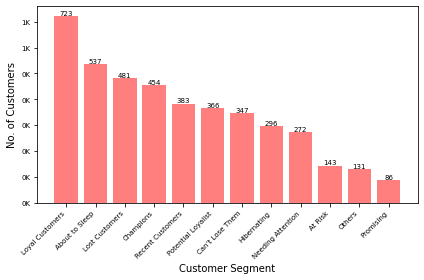

In [16]:
bars = plt.bar(rfm_segments['Segments'], rfm_segments['Count'], color='r', alpha=0.5)
plt.xlabel('Customer Segment')
plt.ylabel('No. of Customers')
plt.xticks(rotation=45, ha='right', fontsize=7)
plt.yticks(fontsize=7)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '%1.0fK' % (x * 1e-3)))
plt.tight_layout()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=7)
plt.show()